(198982, 1024)
      Label  Count
0    Z12.11  12452
1     J34.3  10928
2     J34.2   9349
3     J35.3   7901
4    J34.89   7565
5    K57.30   7342
6     J35.2   6337
7     K63.5   5849
8    J35.01   5758
9    H66.93   5626
10  Z86.010   4938
11    K64.8   4930
12    N84.0   4540
13   K40.90   3992
14   J35.03   3979
15   G47.33   3627
16  Z98.890   3403
17    K02.9   3399
18    Z41.1   3311
19    K44.9   3285


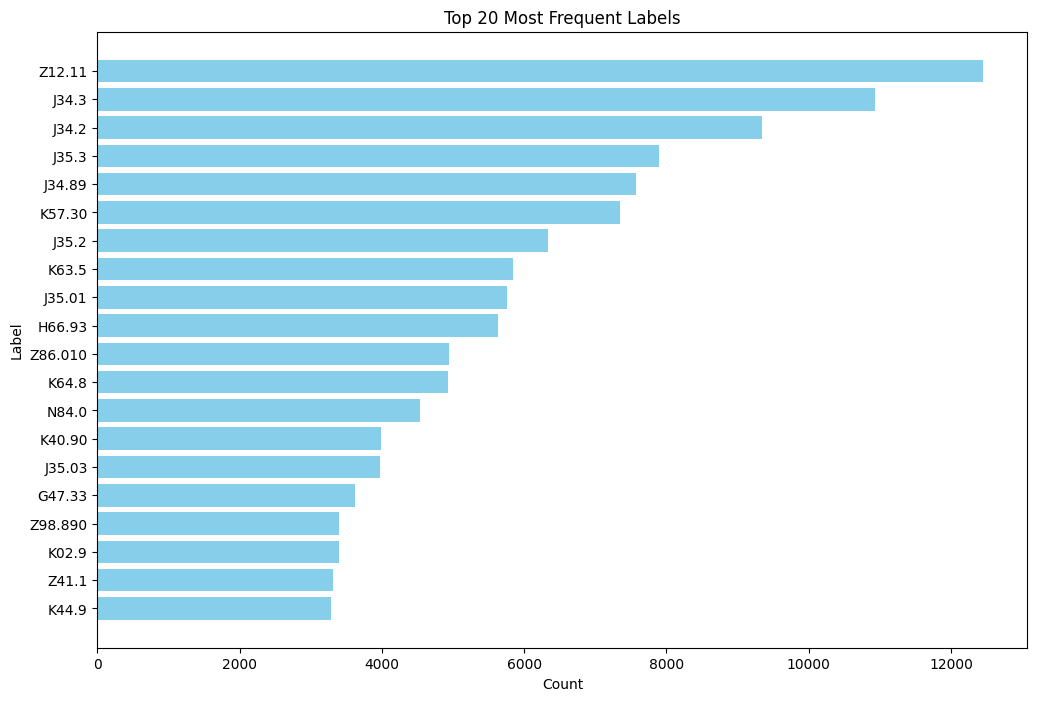

Mean number of labels per datapoint: 2.112758943019972
Median number of labels per datapoint: 2.0
Standard deviation of labels per datapoint: 1.441684594922168


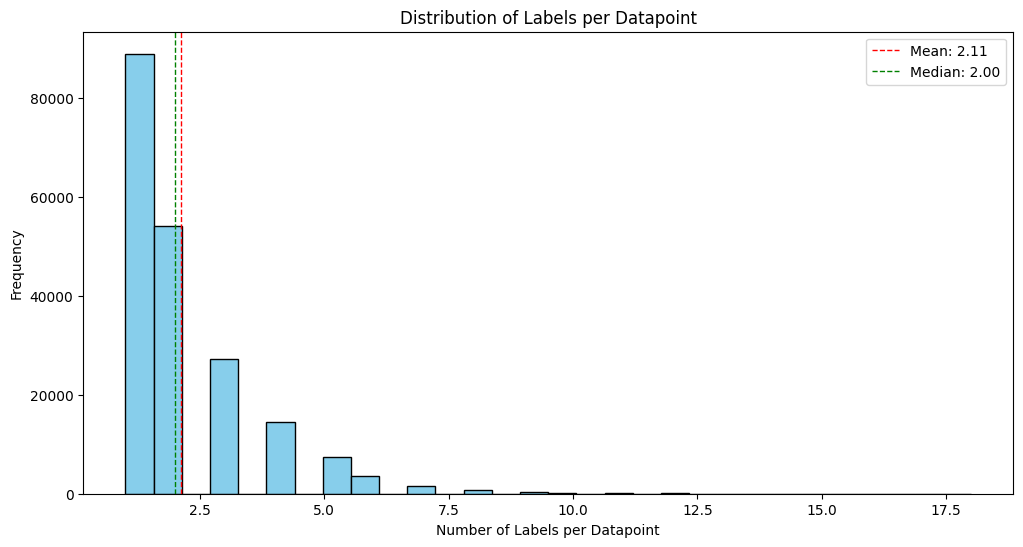

          Label Pair  Count
0     (J34.3, J34.2)   7872
1   (Z12.11, K57.30)   4081
2    (Z12.11, K63.5)   3841
3    (J34.89, J34.3)   3555
4    (J34.89, J34.2)   3385
5  (Z12.11, Z86.010)   2533
6    (K64.8, Z12.11)   2277
7    (J35.3, G47.33)   2107
8  (Z86.010, K57.30)   1684
9    (K64.8, K57.30)   1684


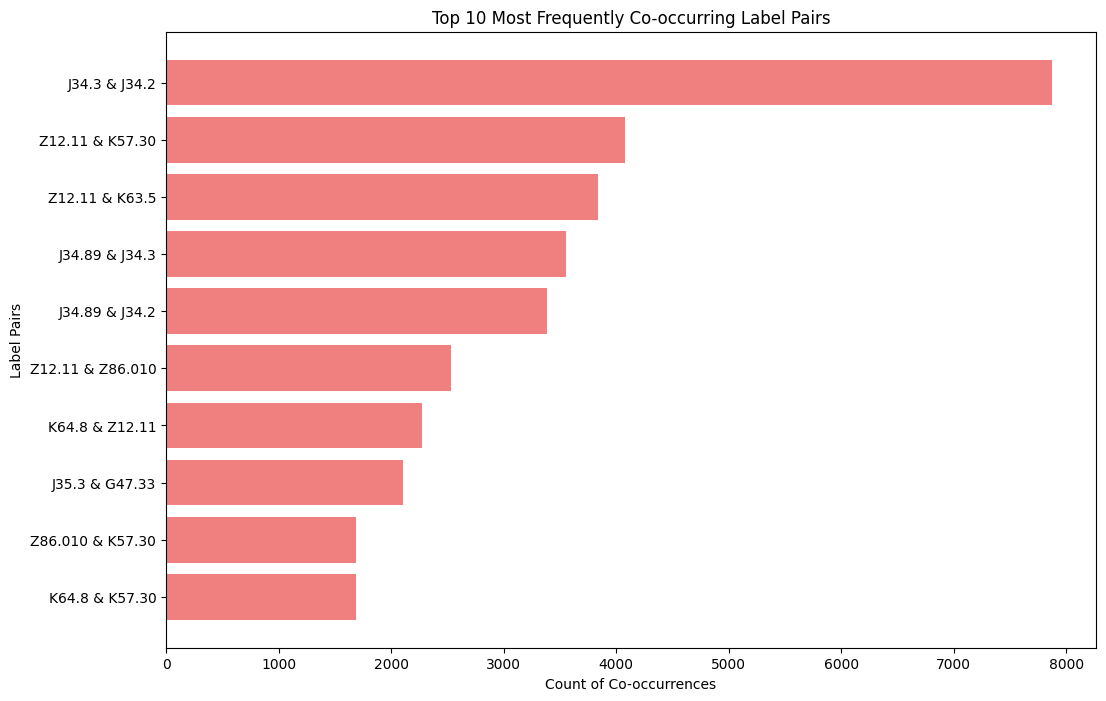

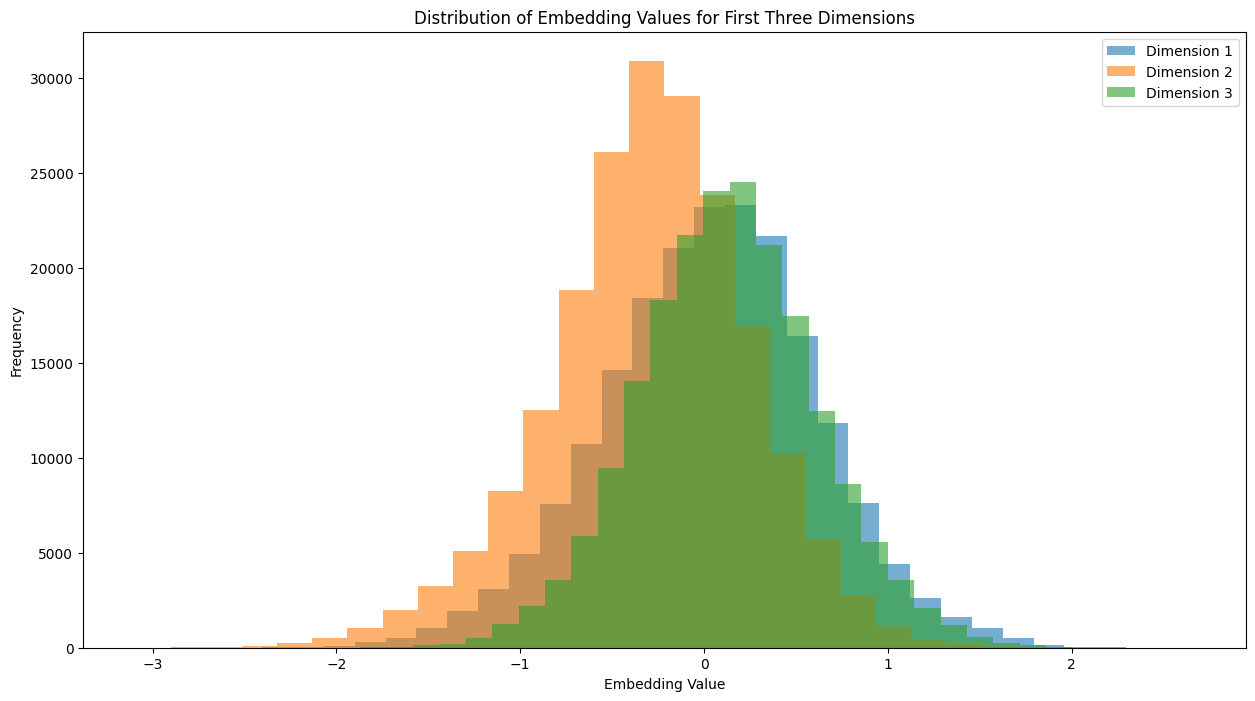

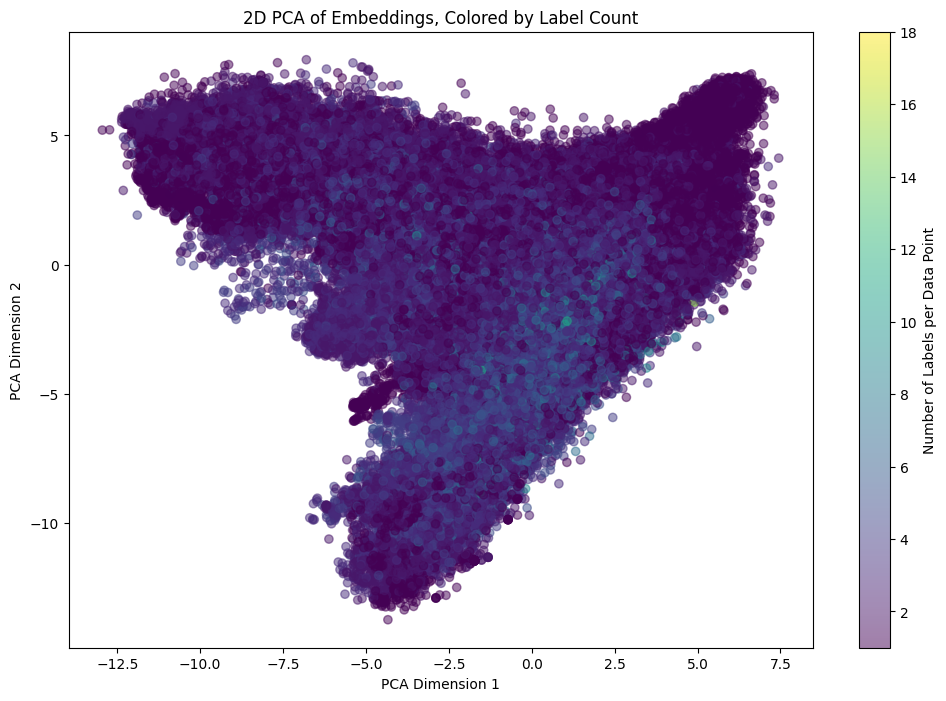

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter
from itertools import combinations
from sklearn.decomposition import PCA

# Load embeddings
embeddings_1 = np.load('embeddings_1.npy')
embeddings_2 = np.load('embeddings_2.npy')
embeddings = np.vstack([embeddings_1, embeddings_2])
print(embeddings.shape)

# Load labels
def load_labels(file_path):
    with open(file_path, 'r') as f:
        labels = [line.strip().replace("'", "").split(';') for line in f.readlines()]
    return labels

labels_1 = load_labels('icd_codes_1.txt')
labels_2 = load_labels('icd_codes_2.txt')
labels = labels_1 + labels_2

# EDA LABELS

# Flatten all label lists into one single list
all_labels = [label for labels in labels for label in labels]

# Count occurrences of each label
label_counts = Counter(all_labels)

# Get the 20 most common labels
top_20_labels = label_counts.most_common(20)
top_20_df = pd.DataFrame(top_20_labels, columns=['Label', 'Count'])

# Display and plot
print(top_20_df)

plt.figure(figsize=(12, 8))
plt.barh(top_20_df['Label'], top_20_df['Count'], color='skyblue')
plt.gca().invert_yaxis()  # Largest at the top
plt.xlabel("Count")
plt.ylabel("Label")
plt.title("Top 20 Most Frequent Labels")
plt.show()

num_labels_per_datapoint = [len(labels) for labels in labels]

# Calculate statistics
mean_labels = np.mean(num_labels_per_datapoint)
median_labels = np.median(num_labels_per_datapoint)
std_labels = np.std(num_labels_per_datapoint)

print(f"Mean number of labels per datapoint: {mean_labels}")
print(f"Median number of labels per datapoint: {median_labels}")
print(f"Standard deviation of labels per datapoint: {std_labels}")

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(num_labels_per_datapoint, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Number of Labels per Datapoint")
plt.ylabel("Frequency")
plt.title("Distribution of Labels per Datapoint")
plt.axvline(mean_labels, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_labels:.2f}')
plt.axvline(median_labels, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_labels:.2f}')
plt.legend()
plt.show()

co_occurrence_counts = Counter()

# For each set of labels, generate all unique pairs and count them
for label_set in labels:
    for combo in combinations(label_set, 2):
        co_occurrence_counts[combo] += 1

# Display the top 10 most common co-occurring pairs
top_10_co_occurrences = co_occurrence_counts.most_common(10)
top_10_co_occurrence_df = pd.DataFrame(top_10_co_occurrences, columns=['Label Pair', 'Count'])
print(top_10_co_occurrence_df)

# Split the label pairs into two columns for better readability in the plot
top_10_co_occurrence_df['Label 1'] = top_10_co_occurrence_df['Label Pair'].apply(lambda x: x[0])
top_10_co_occurrence_df['Label 2'] = top_10_co_occurrence_df['Label Pair'].apply(lambda x: x[1])

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(
    top_10_co_occurrence_df['Label 1'] + " & " + top_10_co_occurrence_df['Label 2'],
    top_10_co_occurrence_df['Count'],
    color='lightcoral'
)
plt.xlabel("Count of Co-occurrences")
plt.ylabel("Label Pairs")
plt.title("Top 10 Most Frequently Co-occurring Label Pairs")
plt.gca().invert_yaxis()  # Largest count at the top
plt.show()

# EDA Embeddings

# Plot the distribution of embedding values for the first few dimensions
plt.figure(figsize=(15, 8))
for i in range(3):  # Visualize first three dimensions as an example
    plt.hist(embeddings[:, i], bins=30, alpha=0.6, label=f'Dimension {i+1}')
plt.xlabel("Embedding Value")
plt.ylabel("Frequency")
plt.title("Distribution of Embedding Values for First Three Dimensions")
plt.legend()
plt.show()

# Reduce dimensions to 2D with PCA
pca_embeddings = PCA(n_components=2).fit_transform(embeddings)

plt.figure(figsize=(12, 8))
plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], alpha=0.5, c=[len(l) for l in labels], cmap='viridis')
plt.colorbar(label='Number of Labels per Data Point')
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("2D PCA of Embeddings, Colored by Label Count")
plt.show()

